<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.943286,34.761011,0.118451,134.822748,134.661404,0.161344
1,0.0,1.0,68.182915,46.238076,-0.058036,124.362955,124.346332,0.016623
2,0.0,2.0,30.903943,32.846710,0.083762,73.834415,73.728162,0.106253
3,0.0,3.0,43.866498,83.963974,0.107642,137.938114,137.640015,0.298099
4,0.0,4.0,73.628150,92.398135,-0.056403,175.969882,175.801456,0.168426
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.695568,92.551531,-0.012248,126.234851,126.024149,0.210702
59996,999.0,56.0,27.758267,90.547128,-1.631730,126.673665,128.096077,-1.422411
59997,999.0,57.0,51.025558,23.749816,0.296608,85.071982,84.700330,0.371652
59998,999.0,58.0,60.460312,85.948835,1.744017,158.153165,156.297836,1.855328


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.943286,34.761011,0.118451,134.822748,134.661404,0.161344
1,0.0,1.0,68.182915,46.238076,-0.058036,124.362955,124.346332,0.016623
2,0.0,2.0,30.903943,32.846710,0.083762,73.834415,73.728162,0.106253
3,0.0,3.0,43.866498,83.963974,0.107642,137.938114,137.640015,0.298099
4,0.0,4.0,73.628150,92.398135,-0.056403,175.969882,175.801456,0.168426
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.695568,92.551531,-0.012248,126.234851,126.024149,0.210702
59996,999.0,56.0,27.758267,90.547128,-1.631730,126.673665,128.096077,-1.422411
59997,999.0,57.0,51.025558,23.749816,0.296608,85.071982,84.700330,0.371652
59998,999.0,58.0,60.460312,85.948835,1.744017,158.153165,156.297836,1.855328


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.943286,34.761011,0.118451,134.822748,134.661404,0.161344
1,0.0,1.0,68.182915,46.238076,-0.058036,124.362955,124.346332,0.016623
2,0.0,2.0,30.903943,32.846710,0.083762,73.834415,73.728162,0.106253
3,0.0,3.0,43.866498,83.963974,0.107642,137.938114,137.640015,0.298099
4,0.0,4.0,73.628150,92.398135,-0.056403,175.969882,175.801456,0.168426
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.695568,92.551531,-0.012248,126.234851,126.024149,0.210702
59996,999.0,56.0,27.758267,90.547128,-1.631730,126.673665,128.096077,-1.422411
59997,999.0,57.0,51.025558,23.749816,0.296608,85.071982,84.700330,0.371652
59998,999.0,58.0,60.460312,85.948835,1.744017,158.153165,156.297836,1.855328


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

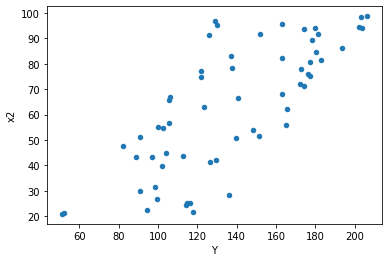

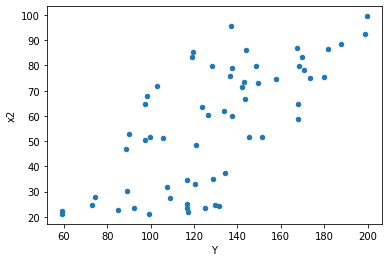

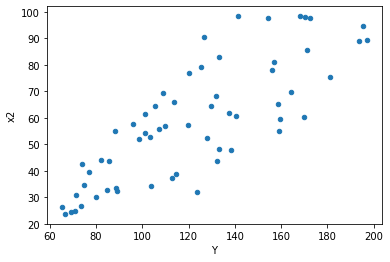

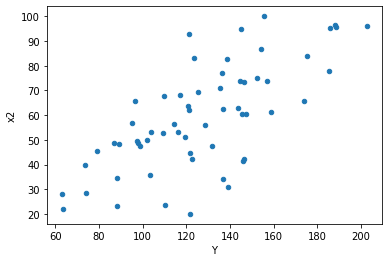

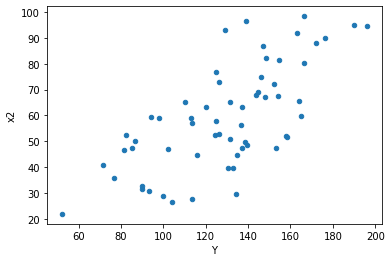

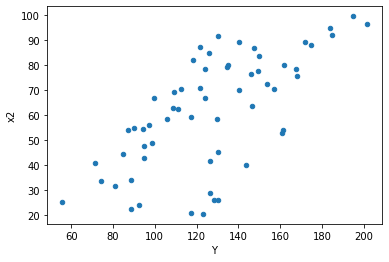

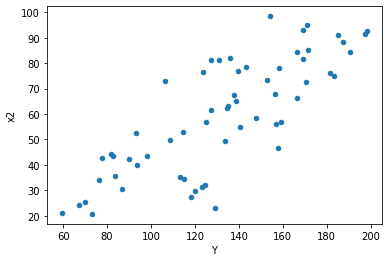

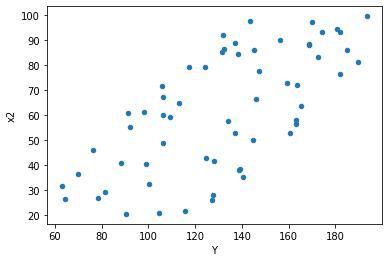

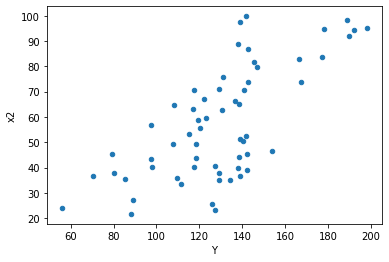

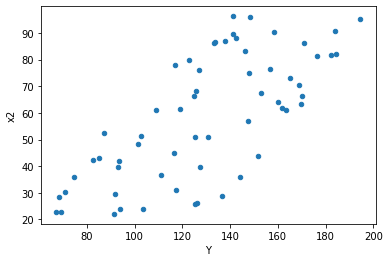

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,6.627578367097243,7.497818277672391,0.30125356214078375,0.34080992171238145,1.1313058650344257,0.7748960097685003,0.6125519951157499,0.38744800488425013,Reject005=1 : Homoscedasticity
1.0,22.0,22.0,4.5312659232324615,14.490880161782881,0.2059666328742028,0.658676370990131,3.1979761080642,0.008645813912361078,0.9956770930438195,0.004322906956180539,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,10.188175445707175,17.391568535518292,0.4630988838957807,0.7905258425235587,1.707034652887362,0.2176631269959517,0.8911684365020242,0.10883156349797585,Reject005=1 : Homoscedasticity
5.0,22.0,22.0,7.187770581484244,17.183694511353647,0.3267168446129202,0.7810770232433476,2.390684888527047,0.04652297070752365,0.9767385146462382,0.023261485353761824,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,16.503027227283223,17.306150963448793,0.7501376012401465,0.7866432256113088,1.0486652372988774,0.9122697483271605,0.5438651258364198,0.45613487416358023,Reject005=1 : Homoscedasticity
11.0,22.0,22.0,10.195361847629789,10.734324447200184,0.4634255385286268,0.48792383850909926,1.0528635086841662,0.9049275826256369,0.5475362086871816,0.45246379131281844,Reject005=1 : Homoscedasticity
13.0,22.0,22.0,3.8449692109881015,12.130415717645645,0.17477132777218643,0.5513825326202566,3.1548798057938945,0.00941517128830549,0.9952924143558473,0.004707585644152745,Reject005=0 : Heteroscedasticity
14.0,22.0,22.0,5.6709107728711095,8.150017199595162,0.25776867149414134,0.37045532725432556,1.4371619526415,0.4016549869418937,0.7991725065290531,0.20082749347094686,Reject005=1 : Homoscedasticity
17.0,22.0,22.0,7.554426030841281,8.444320245493529,0.3433830014018764,0.38383273843152405,1.1177977269244832,0.796293059612434,0.601853470193783,0.398146529806217,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,6.627578367097243,7.497818277672391,0.30125356214078375,0.34080992171238145,1.1313058650344257,0.7748960097685003,Reject005=1 : Homoscedasticity
1.0,22.0,22.0,4.5312659232324615,14.490880161782881,0.2059666328742028,0.658676370990131,3.1979761080642,0.008645813912361078,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,13.776409411194606,11.341641993140975,0.626200427781573,0.5155291815064079,0.823265457247869,0.6522880662981476,Reject005=1 : Homoscedasticity
3.0,22.0,22.0,15.44839184183003,3.6426030727155547,0.7021996291740923,0.16557286694161613,0.2357917322405287,0.0012779867800105395,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,10.188175445707175,17.391568535518292,0.4630988838957807,0.7905258425235587,1.707034652887362,0.2176631269959517,Reject005=1 : Homoscedasticity
5.0,22.0,22.0,7.187770581484244,17.183694511353647,0.3267168446129202,0.7810770232433476,2.390684888527047,0.04652297070752365,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,16.503027227283223,17.306150963448793,0.7501376012401465,0.7866432256113088,1.0486652372988774,0.9122697483271605,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,12.407275371076414,5.656006812331077,0.5639670623216552,0.25709121874232166,0.45586211663490955,0.0719986541848725,Reject005=1 : Homoscedasticity
8.0,22.0,22.0,19.577415113395723,5.791278955727565,0.8898825051543511,0.26323995253307114,0.29581427998453785,0.006060293314531304,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      847
Reject005=0 : Heteroscedasticity    153
Name: Result_test, dtype: int64